In [ ]:
#Import the necessary librariess
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchWindowException, WebDriverException
from bs4 import BeautifulSoup
import pandas as pd
import time



In [ ]:
# Create empty lists to store the user data such as Name, City, Date of Purchase, Review & Rating
Names = []
Cities = [] 
Dates = []
Reviews = [] 
Ratings = []

In [ ]:
# Assign the url of the flipkart website and use selenium to scrape data
url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKART"
driver = webdriver.Chrome()
driver.get(url)

In [ ]:
while len(Names) < 320:
    time.sleep(2)

    try:
        soup = BeautifulSoup(driver.page_source, "html.parser")
    except (NoSuchWindowException, WebDriverException) as e:
        print(f"WebDriver issue: {e}")
        break

    # Extract names
    names_elements = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in names_elements:
        Names.append(name.text.strip())

    # Extract cities
    city_elements = soup.find_all("p", {"class": "MztJPv"})
    for city in city_elements:
        Cities.append(city.text.strip())

    # Extract review dates (every second <p> after usernames)
    dates_elements = soup.find_all("p", {"class": "_2NsDsF"})
    Dates_batch = [d.text.strip() for d in dates_elements]
    Actual_Dates = Dates_batch[1::2]
    Dates.extend(Actual_Dates)

    # Extract reviews
    reviews_elements = soup.find_all("div", {"class": "ZmyHeo"})
    for review in reviews_elements:
        Reviews.append(review.text.strip())

    # Extract ratings
    ratings_elements = soup.find_all("div", class_="XQDdHH Ga3i8K")
    for rating in ratings_elements:
        Ratings.append(rating.text.strip())

    # Click next
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click()
    except:
        print("No more pages.")
        break

# Match lengths
min_len = min(len(Names), len(Cities), len(Dates), len(Reviews), len(Ratings))

# Create DataFrame
df = pd.DataFrame({
    "Name": Names[:min_len],
    "City": Cities[:min_len],
    "Date": Dates[:min_len],
    "Review": Reviews[:min_len],
    "Rating": Ratings[:min_len]
})


In [58]:
# Check the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    320 non-null    object
 1   City    320 non-null    object
 2   Date    320 non-null    object
 3   Review  320 non-null    object
 4   Rating  320 non-null    object
dtypes: object(5)
memory usage: 12.6+ KB


In [70]:
# Drop the duplicates from the dataframe
df1 = df.copy()
df1 = df1.drop_duplicates()
df1


,Name,City,Date,Review,Rating
0,bijaya mohanty,"Certified Buyer, Baleshwar","May, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
1,Rishabh Jha,"Certified Buyer, Tikamgarh","Apr, 2024",Awesome 🔥🔥☺️READ MORE,5
2,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
3,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
...,...,...,...,...,...
315,Gautam Kumar,"Certified Buyer, Nalanda District","Apr, 2024",iPhone 15 shots Nice average camera quality an...,5
316,Battula Asha,"Certified Buyer, Visakhapatnam","Apr, 2024",Amazing 👌READ MORE,5
317,Piyush Jaiswal,"Certified Buyer, Varanasi","Apr, 2024",Best I phone 15READ MORE,5
318,Afzal Saifi,"Certified Buyer, Gurgaon","Apr, 2024",Camera quality SuperbREAD MORE,5


In [71]:
# 2 Convert the Name column data into Title Case
df1['Name'] = df1['Name'].str.title() 
df1.head()

,Name,City,Date,Review,Rating
0,Bijaya Mohanty,"Certified Buyer, Baleshwar","May, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
1,Rishabh Jha,"Certified Buyer, Tikamgarh","Apr, 2024",Awesome 🔥🔥☺️READ MORE,5
2,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
3,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5


In [72]:
# Clean data of City column by removing unwanted characters/ part of string
df1['City'] = df1['City'].str.replace("Certified Buyer, ", "", 
                                      regex=False).str.strip()
df1.head()

,Name,City,Date,Review,Rating
0,Bijaya Mohanty,Baleshwar,"May, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
1,Rishabh Jha,Tikamgarh,"Apr, 2024",Awesome 🔥🔥☺️READ MORE,5
2,Ajin V,Balaghat,"Oct, 2023",High quality camera😍READ MORE,5
3,Mousam Guha Roy,Matialihat,"Oct, 2023",Very niceREAD MORE,4
4,Nikhil Kumar,Meerut Division,"Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5


In [73]:
# Clean data of Review column by removing unwanted characters/ part of string and converting to lowercase
df1['Review'] = df1['Review'].str.lower().str.replace("read more", "",
                                                                     regex=False)
df1.head()

,Name,City,Date,Review,Rating
0,Bijaya Mohanty,Baleshwar,"May, 2024",just go for it.amazing one.beautiful camera wi...,5
1,Rishabh Jha,Tikamgarh,"Apr, 2024",awesome 🔥🔥☺️,5
2,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5
3,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5


In [74]:
! pip install nltk

In [75]:
!pip install textblob


In [76]:
# 3Import libraries for Sentimental analysis of review sentences
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:
# Create a column called Reviews_t that stores tokenized sentences from the Review column using the sent_tokenize function.
df1["Reviews_t"] = df1['Review'].str.split(". ")
df1

,Name,City,Date,Review,Rating,Reviews_t
0,Bijaya Mohanty,Baleshwar,"May, 2024",just go for it.amazing one.beautiful camera wi...,5,"[jus, g, fo, it.amazin, one.beautifu, camer, w..."
1,Rishabh Jha,Tikamgarh,"Apr, 2024",awesome 🔥🔥☺️,5,"[awesom, 🔥🔥☺️]"
2,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,"[hig, qualit, camera😍]"
3,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,"[ver, nice]"
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,"[switc, fro, oneplu, t, iphon, , a, stunne, wi..."
...,...,...,...,...,...,...
315,Gautam Kumar,Nalanda District,"Apr, 2024",iphone 15 shots nice average camera quality an...,5,"[iphon, 1, shot, nic, averag, camer, qualit, a..."
316,Battula Asha,Visakhapatnam,"Apr, 2024",amazing 👌,5,"[amazin, 👌]"
317,Piyush Jaiswal,Varanasi,"Apr, 2024",best i phone 15,5,"[bes, , phon, 15]"
318,Afzal Saifi,Gurgaon,"Apr, 2024",camera quality superb,5,"[camer, qualit, superb]"


In [111]:
from statistics import mean
from textblob import TextBlob

# Function created for assigning Polarity to the Reviews_t column
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Calls get_polarity function on the Reviews_t column to assign polarity
df1['Polarity'] = df1['Reviews_t'].apply(get_polarity)

# Function created to calculate the average polarity of each review (Average of polarity for each sentences in a review)
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Calls calculate_average_polarity function on the Polarity column to assign the average polarity for each review
df1['Average_Polarity'] = df1['Polarity'].apply(calculate_average_polarity)
df1['Average_Polarity'] = df1['Average_Polarity'].round(2)

# Step 5: Display the result
df1.head(10)





,Name,City,Date,Review,Rating,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Bijaya Mohanty,Baleshwar,"May, 2024",just go for it.amazing one.beautiful camera wi...,5,"[jus, g, fo, it.amazin, one.beautifu, camer, w...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.00,neutral
1,Rishabh Jha,Tikamgarh,"Apr, 2024",awesome 🔥🔥☺️,5,"[awesom, 🔥🔥☺️]","[0.0, 0.0]",0.00,neutral
2,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,"[hig, qualit, camera😍]","[0.0, 0.0, 0.0]",0.00,neutral
3,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,"[ver, nice]","[0.0, 0.6]",0.30,positive
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,"[switc, fro, oneplu, t, iphon, , a, stunne, wi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.00,neutral
5,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,"[camer, qualit, i, improve, lovin, it]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.00,neutral
6,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[s, beautiful, s, elegant, jus, , vowww😍❤️]","[0.0, 0.85, 0.0, 0.5, 0.0, 0.0, 0.0]",0.19,positive
7,Flipkart Customer,Aizawl,"Jan, 2024",awesome photography experience. battery backup...,5,"[awesom, photograph, experience, batter, backu...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.00,neutral
8,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5,"[awesom, produc, ver, happ, t, hol, this, bett...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.00,neutral
9,Sheetla Prasad Maurya,Sultanpur,"Oct, 2023",best mobile phonecamera quality is very nice b...,4,"[bes, mobil, phonecamer, qualit, i, ver, nic, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.04,positive


In [112]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
     if polarity > 0.75:
            return 'extremely positive'
     elif 0 < polarity <= 0.75:
               return 'positive'
     elif polarity == 0:
                 return 'neutral'
     elif -0.75 <= polarity < 0:
                     return 'negative'
     else:
                         return 'extremely negative'
                   

In [113]:
# Calls sentiment_class function on the Average_Polarit column to assign the sentiment class
df1['Sentiment_Class'] = df1['Average_Polarity'].apply(sentiment_class)
df1.head()

,Name,City,Date,Review,Rating,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Bijaya Mohanty,Baleshwar,"May, 2024",just go for it.amazing one.beautiful camera wi...,5,"[jus, g, fo, it.amazin, one.beautifu, camer, w...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,neutral
1,Rishabh Jha,Tikamgarh,"Apr, 2024",awesome 🔥🔥☺️,5,"[awesom, 🔥🔥☺️]","[0.0, 0.0]",0.0,neutral
2,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,"[hig, qualit, camera😍]","[0.0, 0.0, 0.0]",0.0,neutral
3,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,"[ver, nice]","[0.0, 0.6]",0.3,positive
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,"[switc, fro, oneplu, t, iphon, , a, stunne, wi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,neutral


In [120]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
polarity_score = df1['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')

if polarity_score > 0.75:
    print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')



Average Polarity Score : 0.06
The Average Polarity Score is Positive


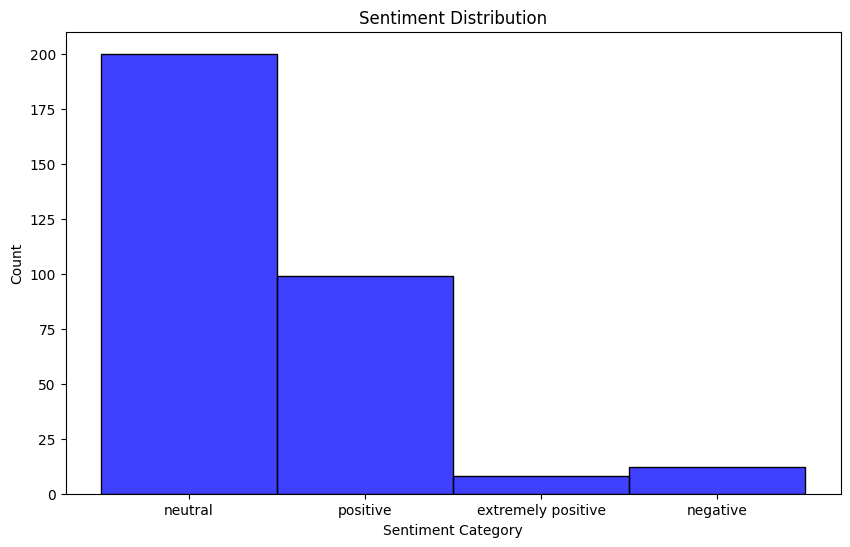

In [124]:
# 4 
# Imports libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6)) 
sns.histplot(x=df1['Sentiment_Class'], color='blue') 
plt.title('Sentiment Distribution') 
plt.xlabel('Sentiment Category') 
plt.ylabel('Count')
plt.show()


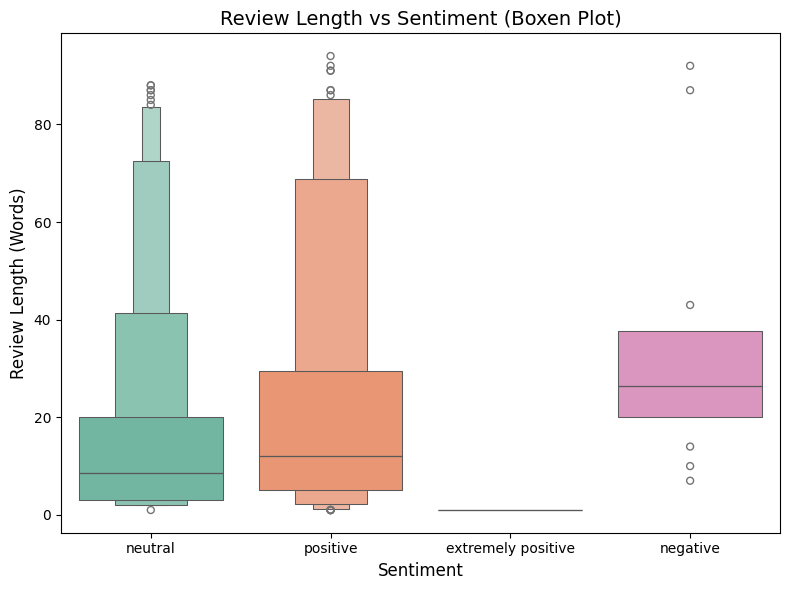

In [132]:
#Sentiment Distribution
df1[ 'Review_Length' ] = df1[ 'Review' ].apply(lambda x: len(x.split()))
#box plot for review lenght by sentiment
plt.figure(figsize=(8, 6))
sns.boxenplot(
    data=df1,
    x='Sentiment_Class',
    y='Review_Length',
    hue='Sentiment_Class',     # Assign hue
    palette='Set2',
    dodge=False                 # Prevent split boxes
)
plt.legend([], [], frameon=False)  # Hide redundant legend
plt.title('Review Length vs Sentiment (Boxen Plot)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Words)', fontsize=12)
plt.tight_layout()
plt.show()




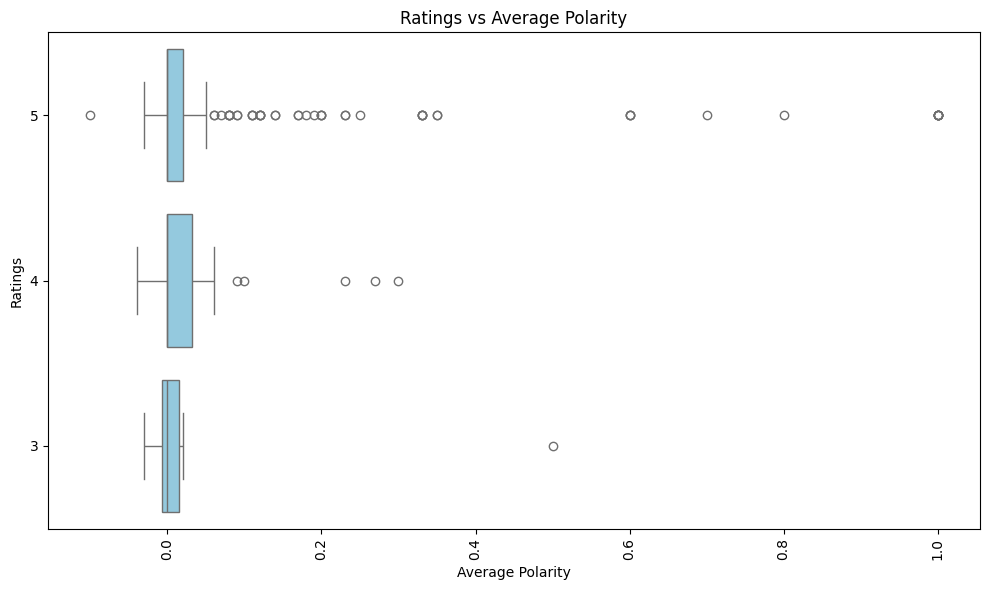

In [163]:
# Plotting Ratings vs Average Polarity
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df1,
    x='Average_Polarity',
    y='Ratings',
    color='skyblue'  
)

plt.title('Ratings vs Average Polarity')
plt.xlabel('Average Polarity')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
